In [15]:
# CPSC415/515 Big Data Programming
# Project 3: Visualization and Prediction of heart attacks
# Group: Cody Bauer, Demyre Ramp

In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

heart_analysis_file_name = "heart.csv"

In [64]:
def load_data():
    
    # Load the CSV data into a DataFrame
    df = pd.read_csv(heart_analysis_file_name)
    
    # Extract data from each health parameter
    df.columns = ["Age", "Sex", "Chest Pain", "RBP", "Chol", "FBS", "RECG", "Max Heart Rate", "EXNG", "Old Peak", "Slope", "CAA", "Thalium", "Heart Attack"]

    return df

data_cleaned = load_data()
data_cleaned

,Age,Sex,Chest Pain,RBP,Chol,FBS,RECG,Max Heart Rate,EXNG,Old Peak,Slope,CAA,Thalium,Heart Attack
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


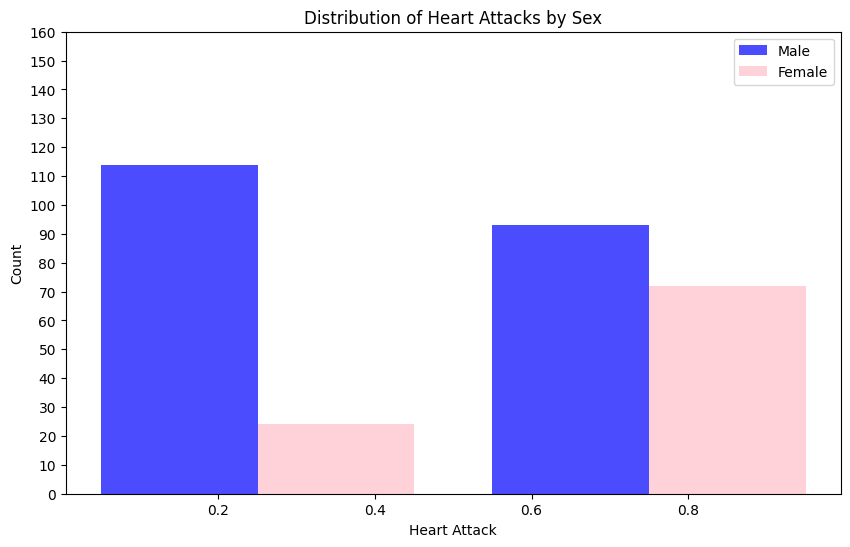

In [80]:
def plot_heart_attack_by_sex(data_cleaned):
    # Separate data by sex
    male_data = data_cleaned[data_cleaned['Sex'] == 1]['Heart Attack']
    female_data = data_cleaned[data_cleaned['Sex'] == 0]['Heart Attack']

    # Create a histogram
    plt.figure(figsize=(10, 6))

    # Plot the data
    bins = np.array([0, 1])
    plt.hist([male_data, female_data], bins=2, label=['Male', 'Female'], color=['blue', 'pink'], alpha=0.7)

    # Set X and Y-axis
    plt.xticks(ticks=[0, 1])
    max_count = max(data_cleaned['Heart Attack'].value_counts())
    plt.yticks(range(0, max_count+1, 10))

    # Adding titles and labels
    plt.title('Distribution of Heart Attacks by Sex')
    plt.xlabel('Heart Attack')
    plt.ylabel('Count')
    plt.legend()

    # Show the plot
    plt.show()

sorted = plot_heart_attack_by_sex(data_cleaned)
sorted


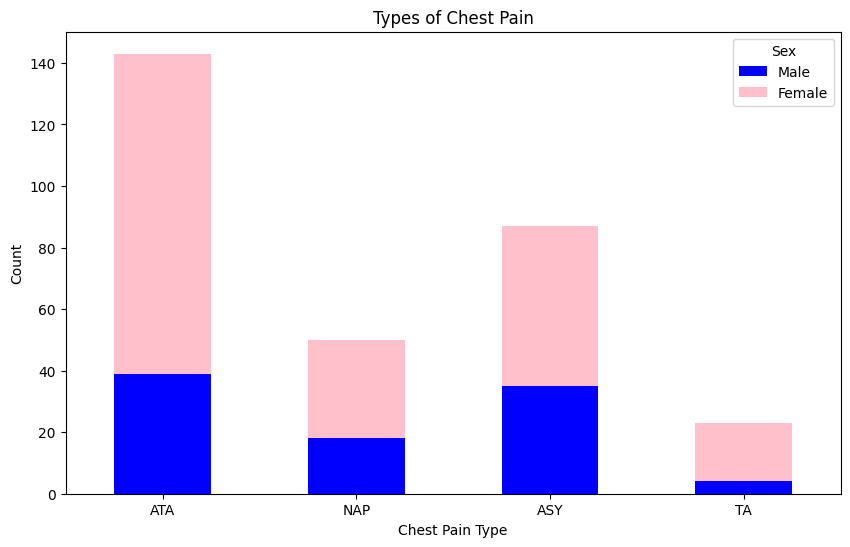

In [79]:
def plot_chest_pain_types(data_cleaned):
    # Get counts for each combination of ChestPainType and Sex
    counts = data_cleaned.groupby(['Chest Pain', 'Sex']).size().unstack(fill_value=0)

    # Create the bar plot
    ax = counts.plot(kind='bar', stacked=True, figsize=(10, 6), color=['blue', 'pink'])

    # Set the title and labels
    ax.set_title('Types of Chest Pain')
    ax.set_xlabel('Chest Pain Type')
    ax.set_ylabel('Count')
    
    # Set x-axis tick labels upright
    ax.set_xticklabels(['ATA', 'NAP', 'ASY', 'TA'], rotation=0)

    # Add legend
    ax.legend(title='Sex', labels=['Male', 'Female'])

    # Show the plot
    plt.show()

# Call the function with the correct DataFrame
plot_chest_pain_types(data_cleaned)
